In [1]:
#Para que no se vuelva demaciado largo lo separo.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
status = pd.read_csv('./data/status.csv', low_memory=True)
status[:10]

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
5,2,2,25,2013/08/29 12:11:01
6,2,2,25,2013/08/29 12:12:01
7,2,2,25,2013/08/29 12:13:01
8,2,2,25,2013/08/29 12:15:01
9,2,2,25,2013/08/29 12:16:02


In [3]:
tabla = pd.read_csv('./tablIdZip.csv', low_memory=True)
tabla['station_id'] = tabla['id']
tabla[:10]

,Unnamed: 0,id,zipCode,station_id
0,0,2,95113,2
1,1,3,95113,3
2,2,4,95113,4
3,3,5,95113,5
4,4,6,95113,6
5,5,7,95113,7
6,6,8,95113,8
7,7,9,95113,9
8,8,10,95113,10
9,9,11,95113,11


In [7]:
import calendar
trip = pd.read_csv('data/trip.csv', low_memory=False)
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['start_year'] = trip['start_date'].map(lambda x:x.year)
trip['start_hour'] = pd.to_datetime(trip['start_date'], format = '%H', errors = 'coerce').dt.hour
trip['station_id'] = trip ['start_station_id']
trip['start_day'] = pd.to_datetime(trip['start_date'], format = '%H', errors = 'coerce').dt.date
trip = trip.loc[:,('duration', 'start_date', 'station_id', 'subscription_type', 'zip_code','start_hour','start_day' )]
trip[:10]

,duration,start_date,station_id,subscription_type,zip_code,start_hour,start_day
0,63,2013-08-29 14:13:00,66,Subscriber,94127,14,2013-08-29
1,70,2013-08-29 14:42:00,10,Subscriber,95138,14,2013-08-29
2,71,2013-08-29 10:16:00,27,Subscriber,97214,10,2013-08-29
3,77,2013-08-29 11:29:00,10,Subscriber,95060,11,2013-08-29
4,83,2013-08-29 12:02:00,66,Subscriber,94103,12,2013-08-29
5,103,2013-08-29 18:54:00,59,Subscriber,94109,18,2013-08-29
6,109,2013-08-29 13:25:00,4,Subscriber,95112,13,2013-08-29
7,111,2013-08-29 14:02:00,8,Subscriber,95112,14,2013-08-29
8,113,2013-08-29 17:01:00,66,Subscriber,94103,17,2013-08-29
9,114,2013-08-29 11:33:00,10,Subscriber,95060,11,2013-08-29


In [4]:
tabla = tabla.groupby('zipCode')

In [6]:
#95113 94063 94041 94107 94301
tablaAux = tabla.get_group(95113)

In [7]:
statusAux = pd.merge(status, tablaAux, on='station_id', how='right')
statusAux['start_date'] = pd.to_datetime(statusAux['time'])
statusAux['start_day'] = statusAux['start_date'].dt.date
statusAux['start_hour'] = statusAux['start_date'].dt.hour
statusAux[:10]

,station_id,bikes_available,docks_available,time,Unnamed: 0,id,zipCode,start_date,start_day,start_hour
0,2,2,25,2013/08/29 12:06:01,0,2,95113,2013-08-29 12:06:01,2013-08-29,12
1,2,2,25,2013/08/29 12:07:01,0,2,95113,2013-08-29 12:07:01,2013-08-29,12
2,2,2,25,2013/08/29 12:08:01,0,2,95113,2013-08-29 12:08:01,2013-08-29,12
3,2,2,25,2013/08/29 12:09:01,0,2,95113,2013-08-29 12:09:01,2013-08-29,12
4,2,2,25,2013/08/29 12:10:01,0,2,95113,2013-08-29 12:10:01,2013-08-29,12
5,2,2,25,2013/08/29 12:11:01,0,2,95113,2013-08-29 12:11:01,2013-08-29,12
6,2,2,25,2013/08/29 12:12:01,0,2,95113,2013-08-29 12:12:01,2013-08-29,12
7,2,2,25,2013/08/29 12:13:01,0,2,95113,2013-08-29 12:13:01,2013-08-29,12
8,2,2,25,2013/08/29 12:15:01,0,2,95113,2013-08-29 12:15:01,2013-08-29,12
9,2,2,25,2013/08/29 12:16:02,0,2,95113,2013-08-29 12:16:02,2013-08-29,12


In [8]:
tripAux = pd.merge(trip,statusAux, how='right', on=['start_day','start_hour','station_id'])
tripAux[:10]

,duration,start_date_x,station_id,subscription_type,zip_code,start_hour,start_day,bikes_available,docks_available,time,Unnamed: 0,id,zipCode,start_date_y
0,70.0,2013-08-29 14:42:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:00:01,8,10,95113,2013-08-29 14:00:01
1,191.0,2013-08-29 14:38:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:00:01,8,10,95113,2013-08-29 14:00:01
2,70.0,2013-08-29 14:42:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:01:02,8,10,95113,2013-08-29 14:01:02
3,191.0,2013-08-29 14:38:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:01:02,8,10,95113,2013-08-29 14:01:02
4,70.0,2013-08-29 14:42:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:02:01,8,10,95113,2013-08-29 14:02:01
5,191.0,2013-08-29 14:38:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:02:01,8,10,95113,2013-08-29 14:02:01
6,70.0,2013-08-29 14:42:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:03:01,8,10,95113,2013-08-29 14:03:01
7,191.0,2013-08-29 14:38:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:03:01,8,10,95113,2013-08-29 14:03:01
8,70.0,2013-08-29 14:42:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:04:01,8,10,95113,2013-08-29 14:04:01
9,191.0,2013-08-29 14:38:00,10.0,Subscriber,95138,14.0,2013-08-29,8,7,2013/08/29 14:04:01,8,10,95113,2013-08-29 14:04:01


<IPython.core.display.Javascript object>


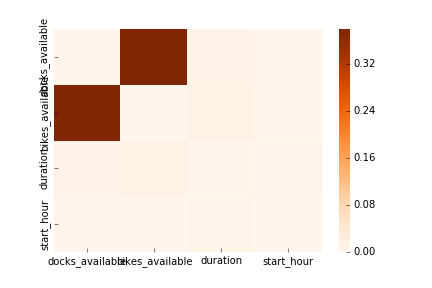

In [12]:
%matplotlib notebook

cor = tripAux.loc[:,['docks_available','bikes_available','duration','start_hour']].corr().abs().loc[:,['docks_available','bikes_available','duration','start_hour']]
cor.values[[np.arange(4)]*2] = 0
sns.heatmap(cor,cmap='Oranges');


<IPython.core.display.Javascript object>


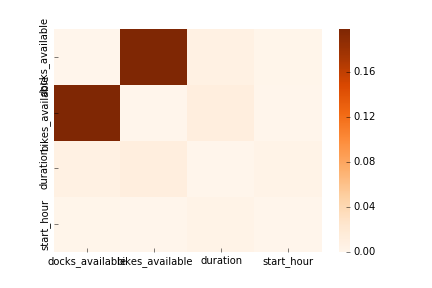

In [14]:
#95113 94063 94041 94107 94301
tablaAux = tabla.get_group(94063)
statusAux = pd.merge(status, tablaAux, on='station_id', how='right')
statusAux['start_date'] = pd.to_datetime(statusAux['time'])
statusAux['start_day'] = statusAux['start_date'].dt.date
statusAux['start_hour'] = statusAux['start_date'].dt.hour
tripAux = pd.merge(trip,statusAux, how='right', on=['start_day','start_hour','station_id'])
%matplotlib notebook

cor = tripAux.loc[:,['docks_available','bikes_available','duration','start_hour']].corr().abs().loc[:,['docks_available','bikes_available','duration','start_hour']]
cor.values[[np.arange(4)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

<IPython.core.display.Javascript object>


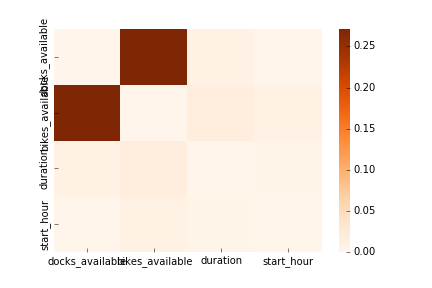

In [15]:
#95113 94063 94041 94107 94301
tablaAux = tabla.get_group(94041)
statusAux = pd.merge(status, tablaAux, on='station_id', how='right')
statusAux['start_date'] = pd.to_datetime(statusAux['time'])
statusAux['start_day'] = statusAux['start_date'].dt.date
statusAux['start_hour'] = statusAux['start_date'].dt.hour
tripAux = pd.merge(trip,statusAux, how='right', on=['start_day','start_hour','station_id'])
%matplotlib notebook

cor = tripAux.loc[:,['docks_available','bikes_available','duration','start_hour']].corr().abs().loc[:,['docks_available','bikes_available','duration','start_hour']]
cor.values[[np.arange(4)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

In [ ]:
#95113 94063 94041 94107 94301
tablaAux = tabla.get_group(94107)
status = pd.merge(status, tablaAux, on='station_id', how='right')
status['start_date'] = pd.to_datetime(status['time'])
status['start_day'] = status['start_date'].dt.date
status['start_hour'] = status['start_date'].dt.hour


In [8]:
tripAux = pd.merge(trip,statusAux, how='right', on=['start_day','start_hour','station_id'])
%matplotlib notebook

cor = tripAux.loc[:,['docks_available','bikes_available','duration','start_hour']].corr().abs().loc[:,['docks_available','bikes_available','duration','start_hour']]
cor.values[[np.arange(4)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

MemoryError: 

In [7]:
#95113 94063 94041 94107 94301
tablaAux = tabla.get_group(94301)
statusAux = pd.merge(status, tablaAux, on='station_id', how='right')
statusAux['start_date'] = pd.to_datetime(statusAux['time'])
statusAux['start_day'] = statusAux['start_date'].dt.date
statusAux['start_hour'] = statusAux['start_date'].dt.hour
tripAux = pd.merge(trip,statusAux, how='right', on=['start_day','start_hour','station_id'])
%matplotlib notebook

cor = tripAux.loc[:,['docks_available','bikes_available','duration','start_hour']].corr().abs().loc[:,['docks_available','bikes_available','duration','start_hour']]
cor.values[[np.arange(4)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

MemoryError: 